In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/data/shufled_data2.csv")
df.head(5)

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-17004,This also applies to friendships with women.,sexist,2. derogation,2.2 aggressive and emotive attacks
1,sexism2022_english-12868,We all hate your dad...and you too!,not sexist,none,none
2,sexism2022_english-12428,Enoch has mixed loyalties. Jew wife and a negr...,not sexist,none,none
3,sexism2022_english-12446,I've been ruined for many years because of thi...,sexist,2. derogation,2.2 aggressive and emotive attacks
4,sexism2022_english-17844,Thank you Richard and a good morning to you. A...,not sexist,none,none


In [3]:
import contractions

for index, row in df.iterrows():
  row['text'] = contractions.fix(row['text'])

In [4]:
####df['text'] = df['text'].str.replace(r'[^\w\s]+', '')

df['text'] = df['text'].str.replace('[(#@&!?)]','')
df['text'] = df['text'].str.replace(r'[^\w\s]+', '')

df.head(5)

C:\Users\mufdu\AppData\Local\Temp\ipykernel_35344\3390418588.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[(#@&!?)]','')
C:\Users\mufdu\AppData\Local\Temp\ipykernel_35344\3390418588.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\w\s]+', '')


,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-17004,This also applies to friendships with women,sexist,2. derogation,2.2 aggressive and emotive attacks
1,sexism2022_english-12868,We all hate your dadand you too,not sexist,none,none
2,sexism2022_english-12428,Enoch has mixed loyalties Jew wife and a negro...,not sexist,none,none
3,sexism2022_english-12446,I have been ruined for many years because of t...,sexist,2. derogation,2.2 aggressive and emotive attacks
4,sexism2022_english-17844,Thank you Richard and a good morning to you A ...,not sexist,none,none


In [7]:
df["text"] = df["text"].str.replace("URL","")
df["text"] = df["text"].str.replace("USER","")
df["text"] = df["text"].str.lower()
df.head(5)

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-17004,this also applies to friendships with women,sexist,2. derogation,2.2 aggressive and emotive attacks
1,sexism2022_english-12868,we all hate your dadand you too,not sexist,none,none
2,sexism2022_english-12428,enoch has mixed loyalties jew wife and a negro...,not sexist,none,none
3,sexism2022_english-12446,i have been ruined for many years because of t...,sexist,2. derogation,2.2 aggressive and emotive attacks
4,sexism2022_english-17844,thank you richard and a good morning to you a ...,not sexist,none,none


In [8]:
df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-17004,this also applies to friendships with women,sexist,2. derogation,2.2 aggressive and emotive attacks
1,sexism2022_english-12868,we all hate your dadand you too,not sexist,none,none
2,sexism2022_english-12428,enoch has mixed loyalties jew wife and a negro...,not sexist,none,none
3,sexism2022_english-12446,i have been ruined for many years because of t...,sexist,2. derogation,2.2 aggressive and emotive attacks
4,sexism2022_english-17844,thank you richard and a good morning to you a ...,not sexist,none,none
...,...,...,...,...,...
17345,sexism2022_english-6478,howzabout if i flip them this way no,not sexist,none,none
17346,sexism2022_english-9798,women always have hidden goals,sexist,2. derogation,2.1 descriptive attacks
17347,sexism2022_english-10721,i am a mgtow bro no one stealing my money i ju...,not sexist,none,none
17348,sexism2022_english-14520,you know what they say people who rape in glas...,not sexist,none,none


In [9]:
df.groupby('label_sexist').describe()

rewire_id                                         text         \
                 count unique                       top freq  count unique   
label_sexist                                                                 
not sexist       10602  10602  sexism2022_english-12868    1  10602  10601   
sexist            6748   3398  sexism2022_english-17004    2   6748   6704   

                                                                      \
                                                            top freq   
label_sexist                                                           
not sexist    trump demands prison for huma abedin like her ...    2   
sexist        not a good look for asian women and so much fo...    2   

             label_category                              label_vector         \
                      count unique            top   freq        count unique   
label_sexist                                                                   
not sexist            10602      1           none  10602        10602      1   
sexist                 6748      4  2. derogation   3154         6748     11   

                                              
                                  top   freq  
label_sexist                                  
not sexist                       none  10602  
sexist        2.1 descriptive attacks   1423

In [10]:
df['label_sexist'].value_counts()

not sexist    10602
sexist         6748
Name: label_sexist, dtype: int64

c:\Users\mufdu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Train Data'}, xlabel='label_sexist', ylabel='count'>

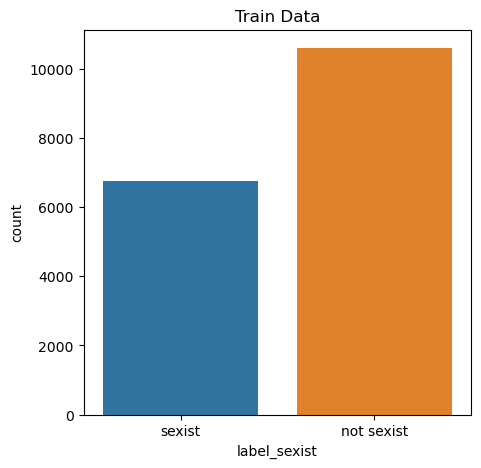

In [11]:
# 0 -> Non_sexist
# 1 -> Sexist
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.title('Train Data')
sns.countplot(df.label_sexist)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
X = df.text
tfid_vec = TfidfVectorizer().fit(X)
X_corpus =  tfid_vec.transform(X)

In [15]:
X_corpus.shape

(17350, 23639)

In [16]:
X = df.text
y = df.label_sexist
label_encoder = LabelEncoder().fit(y)
encoded_y = label_encoder.transform(y)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_corpus, encoded_y , random_state =4)

In [19]:
print(X_train.shape)
print(X_test.shape)

(13012, 23639)
(4338, 23639)


**LOGISTIC REGRESSION**

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
l_model = LogisticRegression()
l_model.fit(X_train, y_train)
l_sentiment_yhat = l_model.predict(X_test)
l_sentiment_accuracy = accuracy_score(y_true = y_test, y_pred = l_sentiment_yhat)
l_sentiment_f1 = f1_score(y_true = y_test, y_pred =l_sentiment_yhat)

In [22]:
print(f"The accuracy from logistic sentiment classification: {l_sentiment_accuracy}")
print(f"with f1 score: {l_sentiment_f1}")
print(classification_report(y_true = y_test, y_pred = l_sentiment_yhat ))

The accuracy from logistic sentiment classification: 0.7704011065006916
with f1 score: 0.6563146997929606
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      2622
           1       0.80      0.55      0.66      1716

    accuracy                           0.77      4338
   macro avg       0.78      0.73      0.74      4338
weighted avg       0.78      0.77      0.76      4338



Text(0.5, 1.0, 'Sentiment classification')

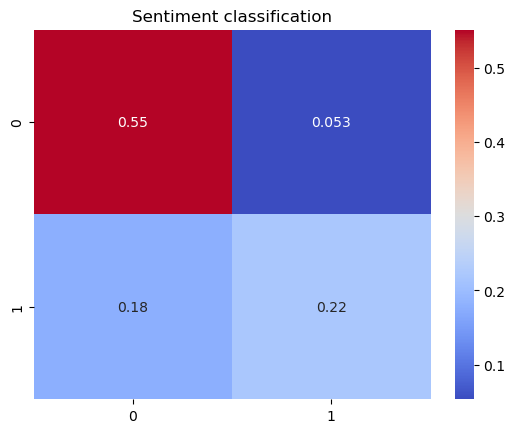

In [23]:
sns.heatmap(confusion_matrix(y_true= y_test, y_pred = l_sentiment_yhat) / len(l_sentiment_yhat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

**Support Vector Classification SVC**

In [24]:
from sklearn.svm import SVC

In [25]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_topic_yhat = svm_model.predict(X_test)
svm_topic_accuracy = accuracy_score(y_true = y_test, y_pred = svm_topic_yhat )
svm_topic_f1 = f1_score(y_true = y_test, y_pred = svm_topic_yhat, average = 'weighted')

In [26]:
print(f"The accuracy from SVM sentiment classification: {svm_topic_accuracy}")
print(f"with f1 score: {svm_topic_f1}")
print(classification_report(y_true = y_test, y_pred = svm_topic_yhat ))

The accuracy from SVM sentiment classification: 0.8201936376210235
with f1 score: 0.8138522892452208
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2622
           1       0.87      0.64      0.74      1716

    accuracy                           0.82      4338
   macro avg       0.83      0.79      0.80      4338
weighted avg       0.83      0.82      0.81      4338



Text(0.5, 1.0, 'Sentiment classification')

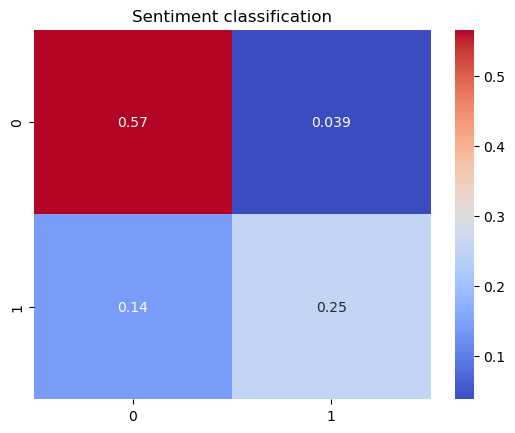

In [27]:
sns.heatmap(confusion_matrix(y_true= y_test, y_pred = svm_topic_yhat) / len(svm_topic_yhat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

**RANDOM FOREST CLASSIFIER**

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_topic_yhat = rf_model.predict(X_test)
rf_topic_accuracy = accuracy_score(y_true = y_test, y_pred = rf_topic_yhat )
rf_topic_f1 = f1_score(y_true = y_test, y_pred = rf_topic_yhat, average = 'weighted')

In [30]:
print(f"The accuracy from Random forest sentiment classification: {rf_topic_accuracy}")
print(f"with f1 score: {rf_topic_f1}")
print(classification_report(y_true = y_test, y_pred = rf_topic_yhat ))

The accuracy from Random forest sentiment classification: 0.8148916551406178
with f1 score: 0.8044005803664059
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      2622
           1       0.91      0.59      0.71      1716

    accuracy                           0.81      4338
   macro avg       0.85      0.78      0.79      4338
weighted avg       0.83      0.81      0.80      4338



Text(0.5, 1.0, 'Sentiment classification')

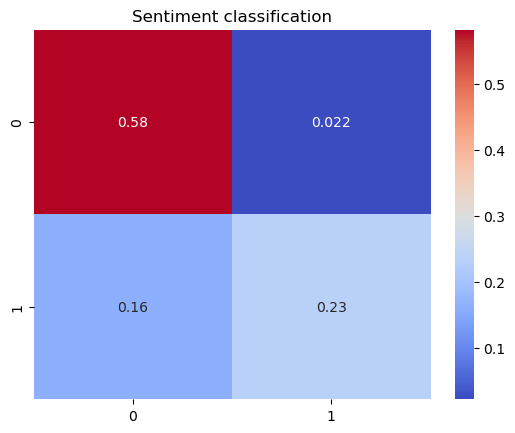

In [31]:
sns.heatmap(confusion_matrix(y_true= y_test, y_pred = rf_topic_yhat) / len(rf_topic_yhat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')